In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

/home/djoe/Documents/myprogramming/hackpython/dataScience/udemy_proj/env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("data/proj2/GME_stock.csv")
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


In [4]:
len(df)

4773

In [5]:
import matplotlib.pyplot as plt

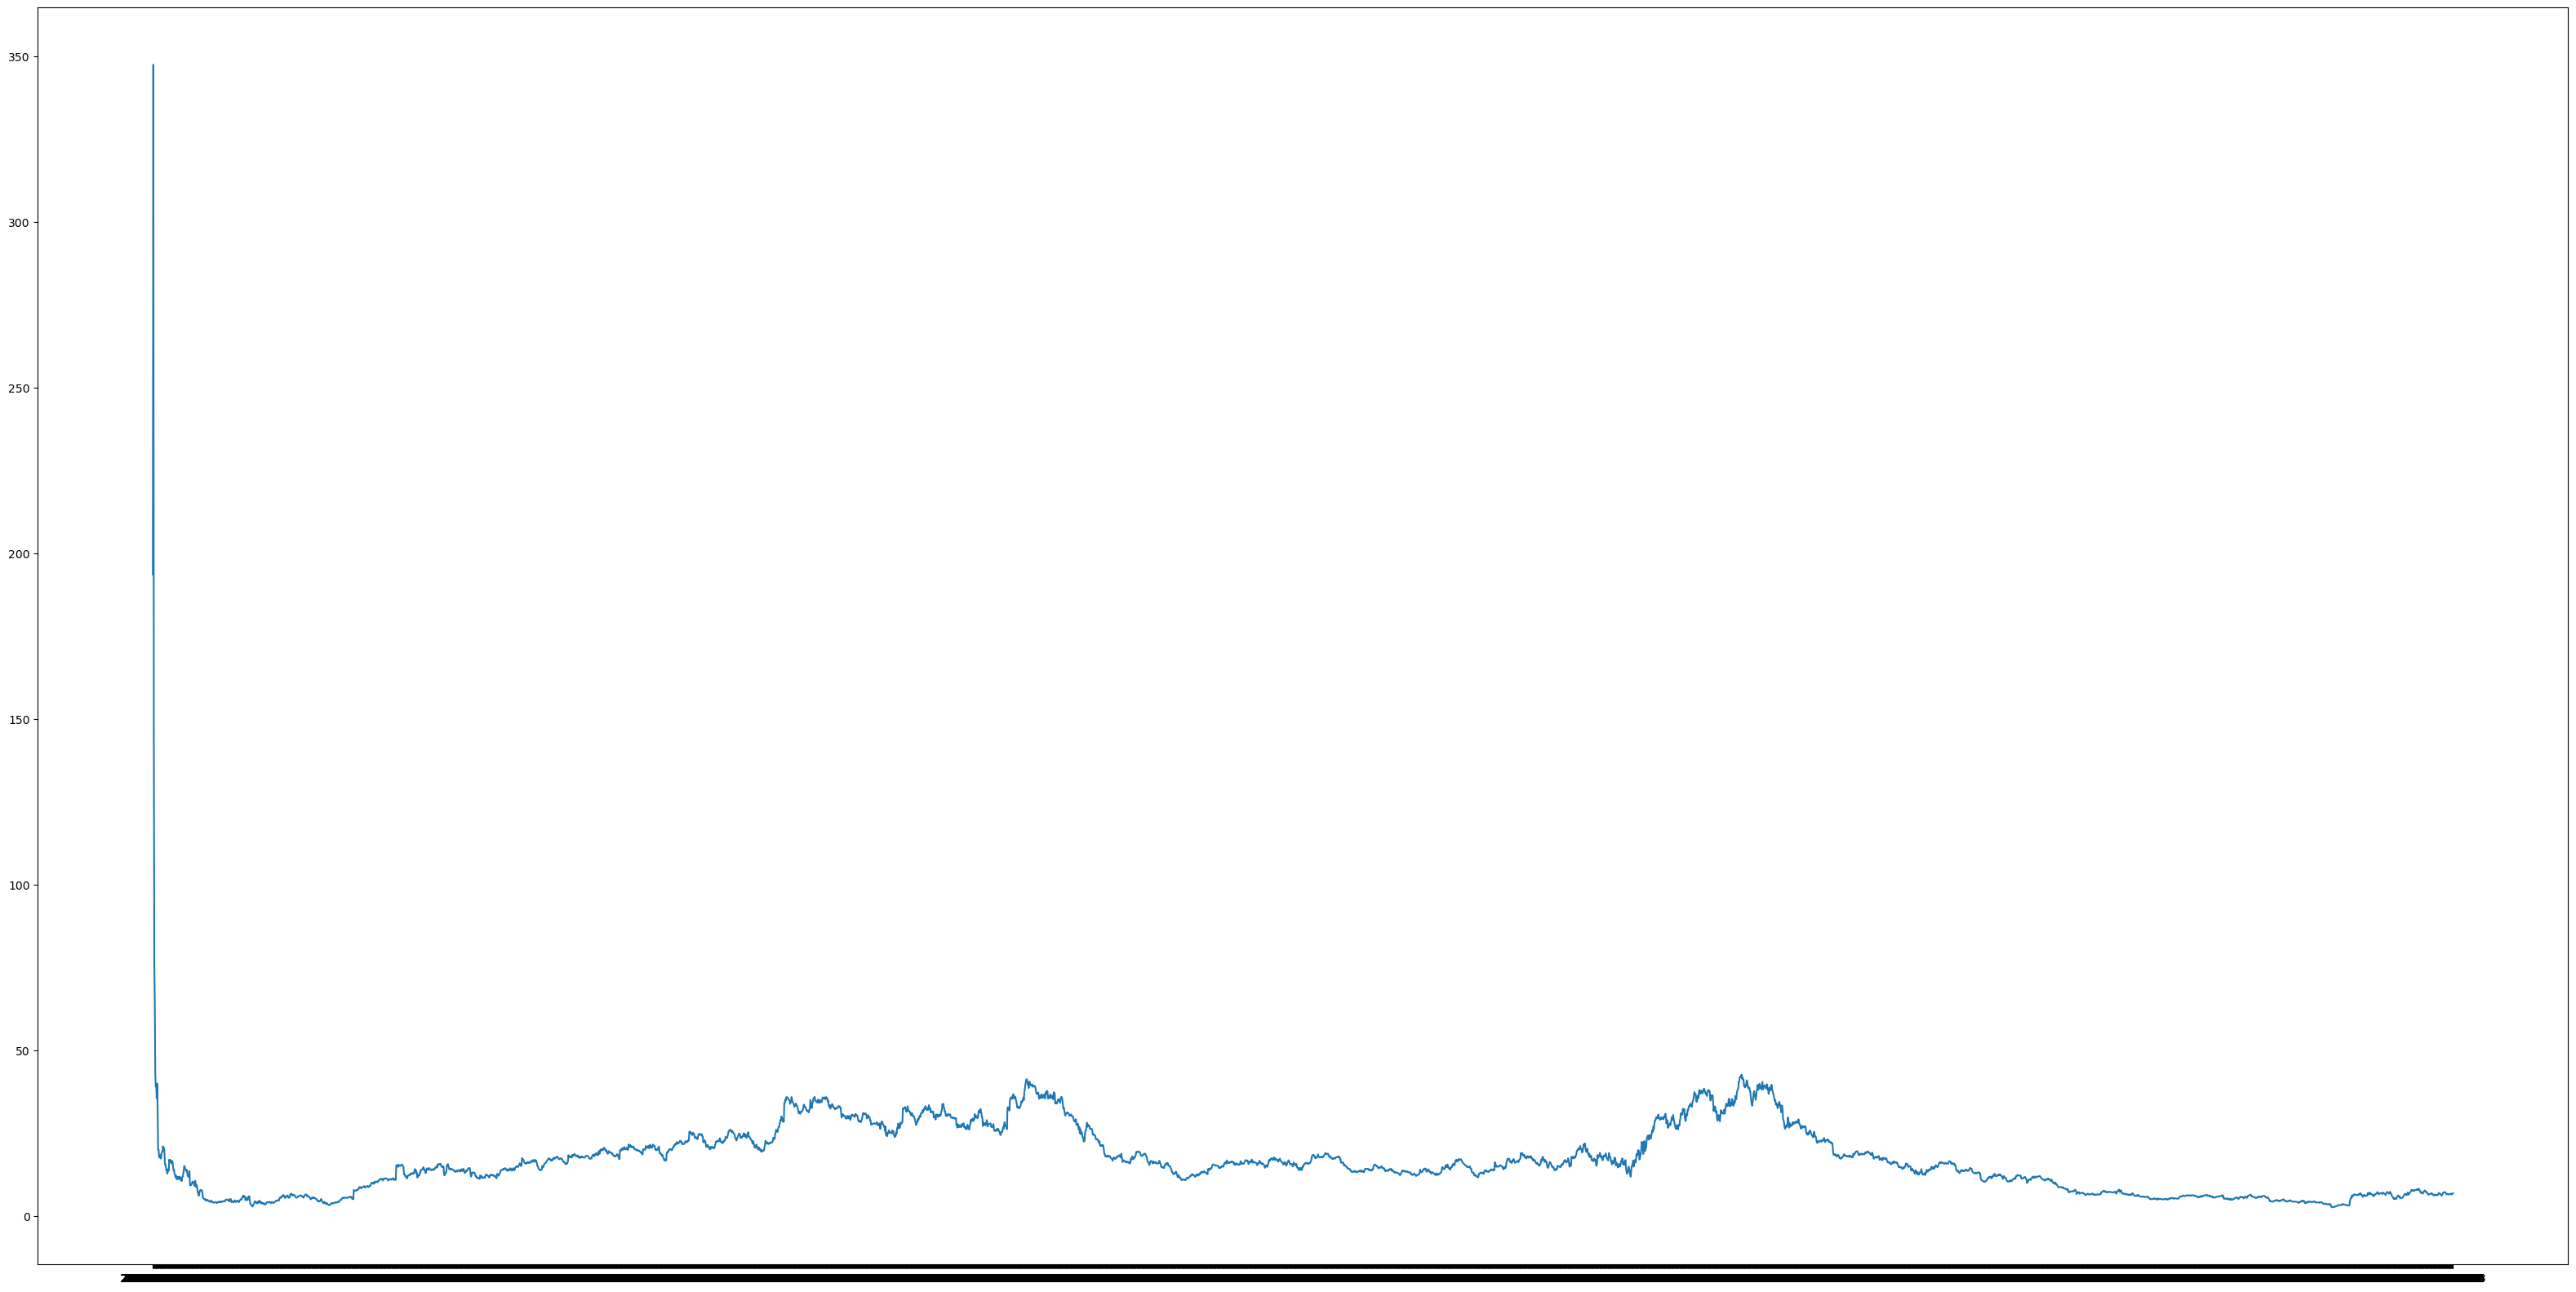

In [37]:
data_x = df["date"]
data_y = df["adjclose_price"]
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(data_x, data_y)

In [8]:
fig.show()

/tmp/ipykernel_60038/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [26]:
df_tmp = df.copy()

In [12]:
pd.to_datetime(df_tmp["date"]).

0      2021-01-28
1      2021-01-27
2      2021-01-26
3      2021-01-25
4      2021-01-22
          ...    
4768   2002-02-20
4769   2002-02-19
4770   2002-02-15
4771   2002-02-14
4772   2002-02-13
Name: date, Length: 4773, dtype: datetime64[ns]

In [27]:
df_tmp["date"] = pd.to_datetime(df_tmp["date"])

In [30]:
df_tmp["date"].dt.day

0       28
1       27
2       26
3       25
4       22
        ..
4768    20
4769    19
4770    15
4771    14
4772    13
Name: date, Length: 4773, dtype: int64

<BarContainer object of 4773 artists>

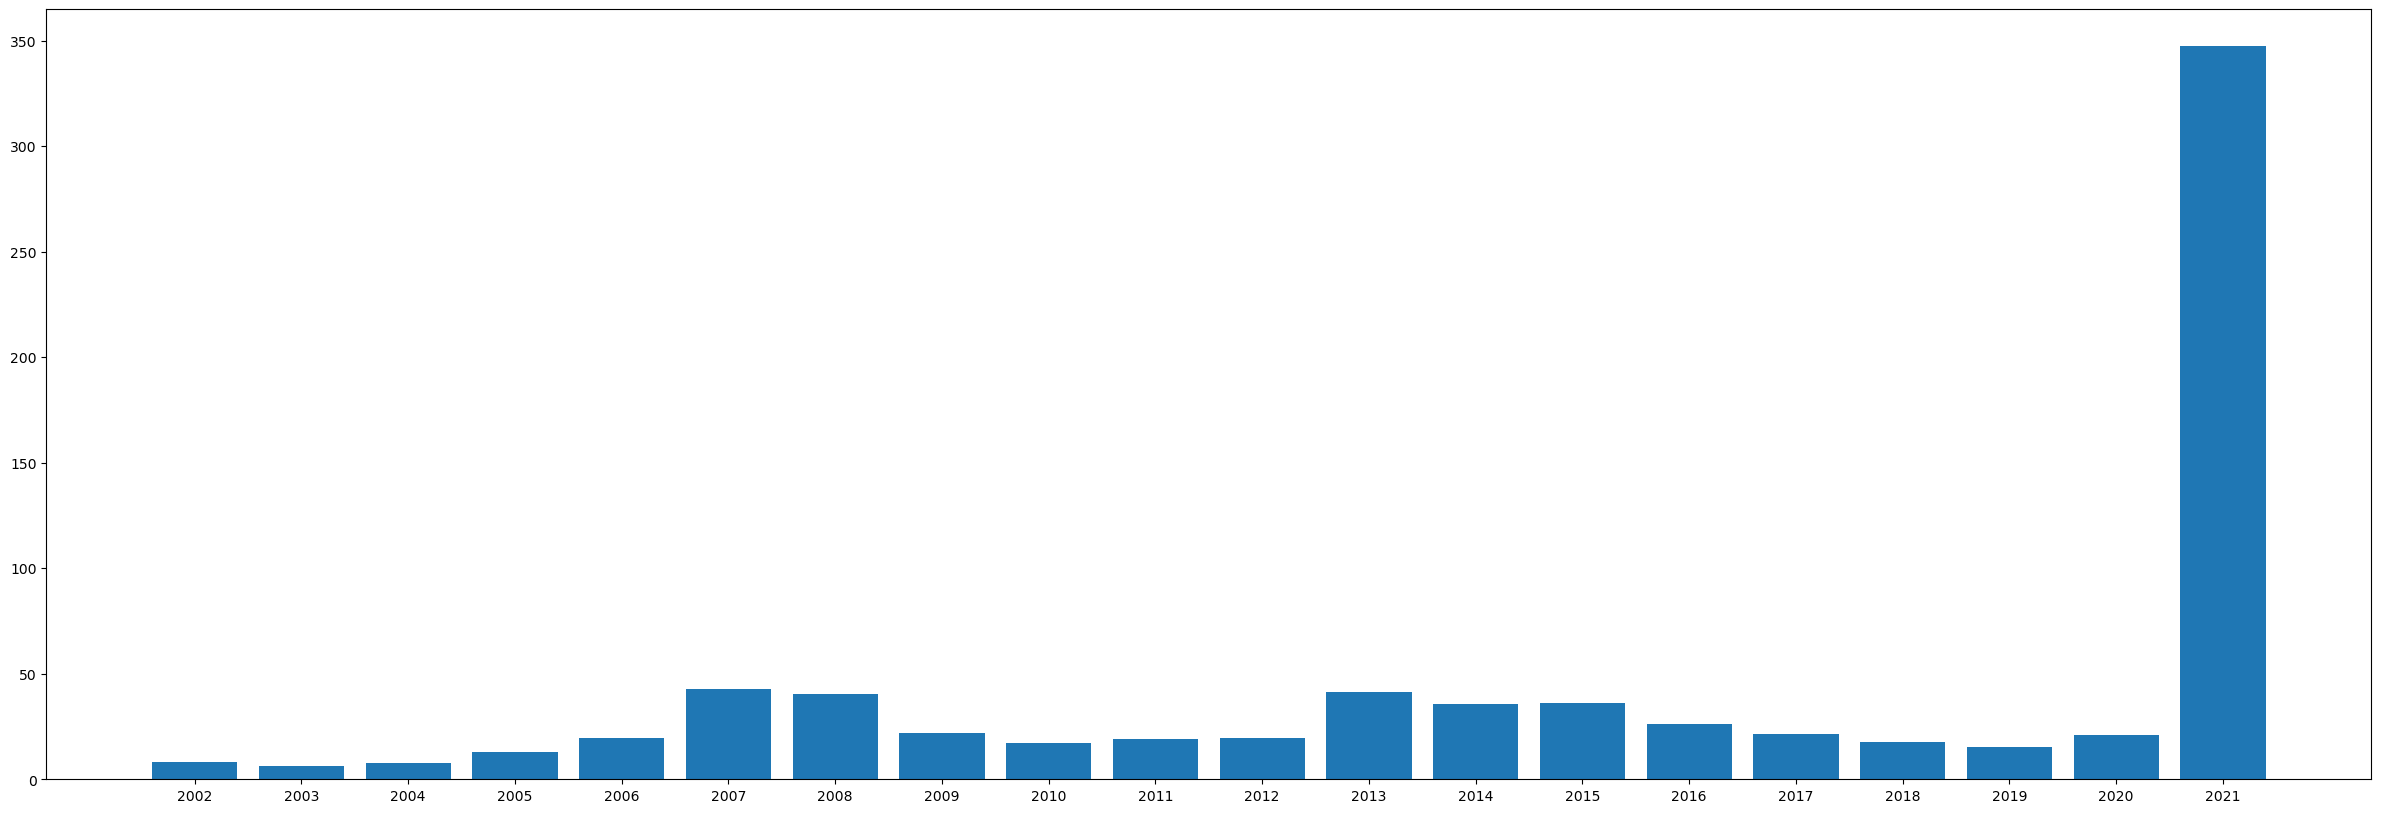

In [45]:
fig, ax = plt.subplots(figsize=(30, 10))
x_tick = df_tmp["date"].dt.year.to_numpy()
x_tick = np.unique(x_tick)
ax.set_xticks(x_tick)
ax.bar(df_tmp["date"].dt.year, df_tmp["adjclose_price"])

In [54]:
date_day = pd.to_datetime(df["date"]).dt.day
date_year = pd.to_datetime(df["date"]).dt.year
date_month = pd.to_datetime(df["date"]).dt.month
df["date_day"] = date_day
df["date_month"] = date_month
df["date_year"] = date_year
df = df.drop("date", axis=1)
df.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price,date_day,date_month,date_year
0,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,28,1,2021
1,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,27,1,2021
2,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,26,1,2021
3,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,25,1,2021
4,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,22,1,2021


In [55]:
X = df.drop("adjclose_price", axis=1)
y = df["adjclose_price"]

## Predictions using Linear Model

### Bayesian ARD regression

In [46]:
from sklearn import linear_model

In [66]:
lnModel1 = linear_model.ARDRegression(compute_score=True, n_iter=300)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(3818, 955, 3818, 955)

In [68]:
lnModel1.fit(X_train, y_train)

ARDRegression(compute_score=True)

In [69]:
lnModel1.score(X_test, y_test)

0.9896501468611023

### Bayesian ridge regression:

In [70]:
lnModel2 = linear_model.BayesianRidge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel2.fit(X_train, y_train)
lnModel2.score(X_test, y_test)

0.9867288250118557

### Gamma Regressor

In [74]:
lnModel3 = linear_model.GammaRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel3.fit(X_train, y_train)
lnModel3.score(X_test, y_test)

0.8476752121537109

### Cross-validated Least Angle Regression model:

In [77]:
lnModel4 = linear_model.LarsCV()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel4.fit(X_train, y_train)
lnModel4.score(X_test, y_test)

/home/djoe/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.9860320198738113

### Lasso

In [78]:
lnModel5 = linear_model.Lasso()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel5.fit(X_train, y_train)
lnModel5.score(X_test, y_test)

0.9846489371020818

### Classic Linear Regression

In [79]:
lnModel6 = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel6.fit(X_train, y_train)
lnModel6.score(X_test, y_test)

0.9891955974905321

### Theil-Sen Estimator: robust multivariate regression model

In [83]:
lnModel4 = linear_model.TheilSenRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lnModel4.fit(X_train, y_train)
lnModel4.score(X_test, y_test)

0.9539676433531014

## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
regModel = RandomForestRegressor(n_estimators=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regModel.fit(X_train, y_train)
regModel.score(X_test, y_test)

0.9987143807877682

In [86]:
## Setting Hyperparameters

# GridSearch Counter Vector

from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_estimators": [100, 200, 300],
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": ["sqrt", "log2"],
}

grid_sc = GridSearchCV(regModel, grid_params, verbose=True)

In [87]:
grid_sc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [91]:
grid_sc.best_params_

{'criterion': 'absolute_error', 'max_features': 'log2', 'n_estimators': 200}